# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
# read the data
df = pd.read_csv('/Users/ryanlynch/Desktop/Data Science/Python - Foundations/Case Study 1 - FoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [28]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [29]:
df.shape[0:2]

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns present in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The data types are int64 (integers), objects (strings - text), and float64 (decimal values).

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [31]:
print(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
Food preparation times (in minutes):

Minimum = 20
Average = 27.37
Maximum = 35


### **Question 5:** How many orders are not rated? [1 mark]

In [32]:
df['rating'].value_counts()['Not given']

736

#### Observations:
736 orders were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [33]:
df['order_id'].nunique() 

1898

In [34]:
df['customer_id'].nunique() 

1200

In [35]:
df['restaurant_name'].nunique()

178

In [36]:
df_1_order=df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending = False)
df_1_order.tail(51)

restaurant_name
Hot Kitchen                      2
Taro Sushi                       1
Socarrat Paella Bar              1
Wa Jeal                          1
Wo Hop Restaurant                1
Woorijip                         1
Sushi Choshi                     1
The MasalaWala                   1
Spice Thai                       1
'wichcraft                       1
Sarabeth's West                  1
Haru Gramercy Park               1
Galli Restaurant                 1
Gaia Italian Cafe                1
Frank Restaurant                 1
Emporio                          1
Dos Caminos Soho                 1
Dig Inn Seasonal Market          1
Crema Restaurante                1
Coppola's East                   1
Cipriani Le Specialita           1
Chote Nawab                      1
Chola Eclectic Indian Cuisine    1
Cafe de La Esquina               1
Big Wong Restaurant _¤¾Ñ¼       1
Balade                           1
Anjappar Chettinad               1
Alidoro                          1
67 B

In [37]:
df['cuisine_type'].nunique()

14

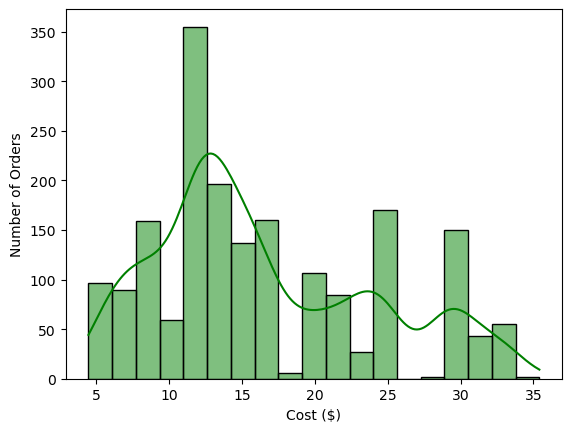

In [38]:
sns.histplot(data=df,x='cost_of_the_order',color='green',kde=True)
plt.xlabel('Cost ($)')
plt.ylabel('Number of Orders');

In [39]:
df['day_of_the_week'].nunique()

2

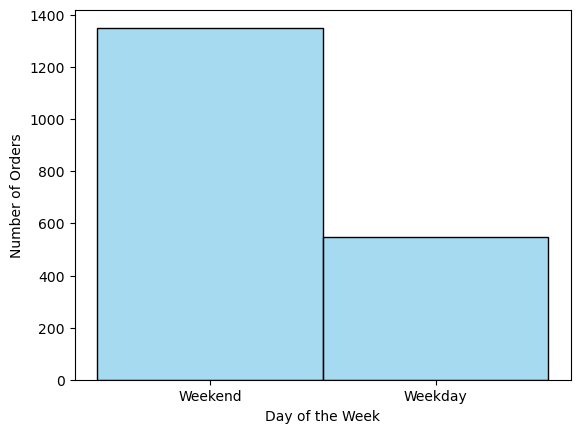

In [49]:
sns.histplot(data=df,x='day_of_the_week',color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders');

In [40]:
df['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

In [8]:
df['rating'] = df['rating'].replace(to_replace='Not given', value=np.nan, inplace=False)

In [23]:
import math

text_string = "NaN"
numeric_value = float('nan')

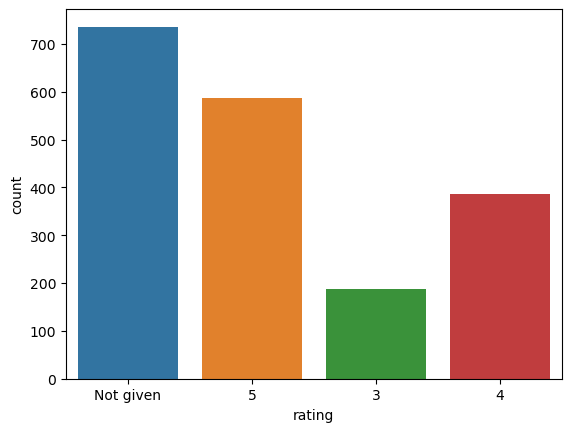

In [54]:
sns.countplot(data=df,x='rating');

In [ ]:
sns.histplot(data=df,x='rat')

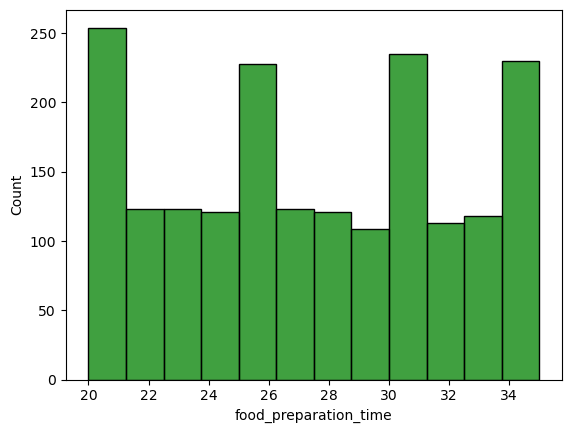

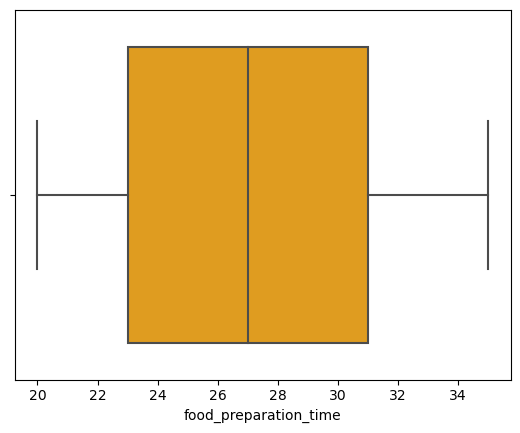

In [58]:
sns.histplot(data=df, x='food_preparation_time', color='green')
plt.show()
sns.boxplot(data=df, x='food_preparation_time', color='orange');

<Axes: xlabel='cuisine_type', ylabel='count'>

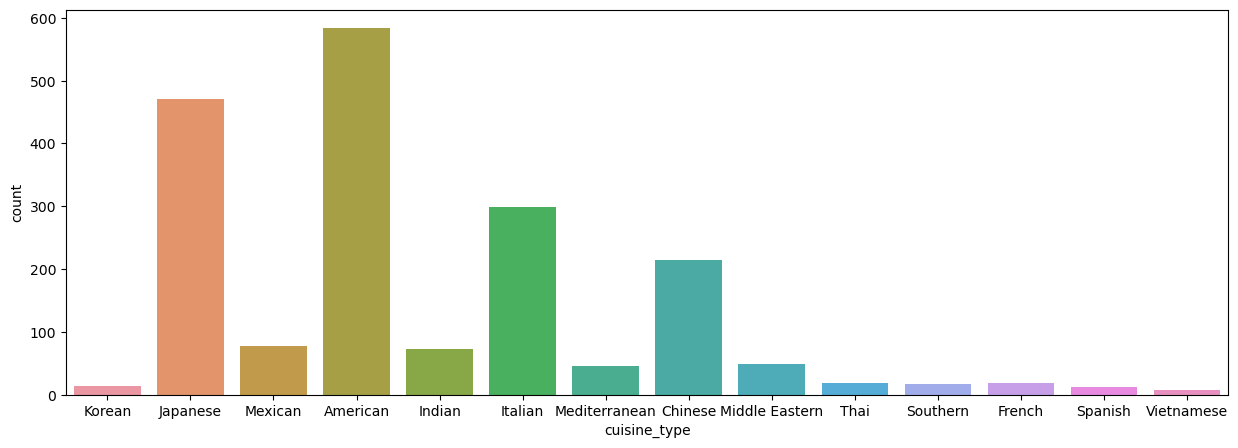

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='cuisine_type')

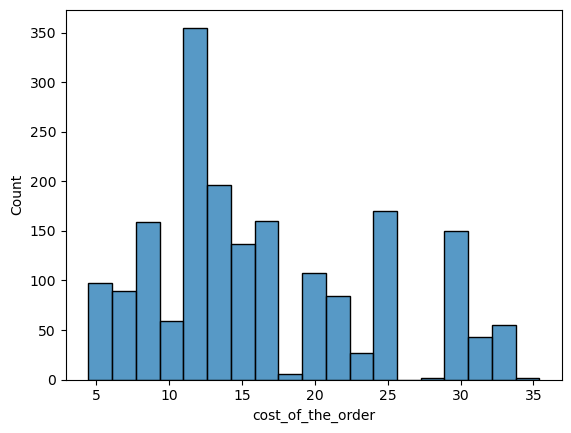

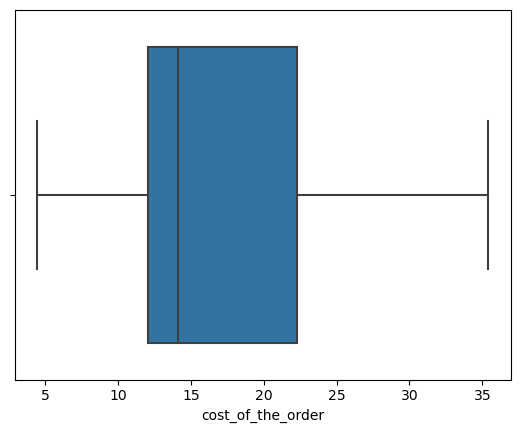

In [51]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order');

<Axes: xlabel='rating', ylabel='count'>

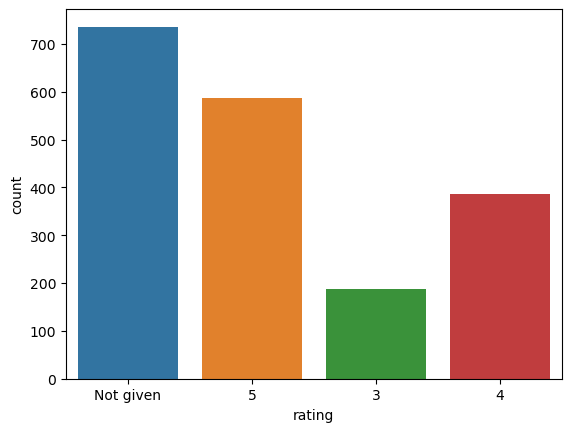

In [52]:
sns.countplot(data=df,x='rating')

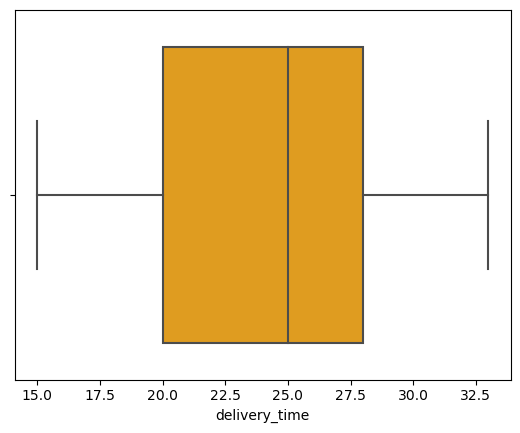

In [52]:
sns.boxplot(data=df, x='delivery_time', color='orange');

In [46]:
cat_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week']
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

restaurant_name
Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: proportion, Length: 178, dtype: float64
--------------------------------------------------
cuisine_type
American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0.006849
Spanish           0.006322
Vietnamese        0.003688
Name: proportion, dtype: float64
---------------------------------------------

In [ ]:
df_only_1_order = df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False)
df_orders_over_20.shape[0]

**Observations**
* Nearly 12% of all orders were for Shake Shack, followed by The Meatball Shop (7%), Blue Ribbon Sushi (6%) and Blue Ribbon Fried Chicken (5%)
* Top three cuisine types were American (30%), Japanese (25%), and Italian (16%), accounting for 71% of total orders
* 71% of orders were placed on the weekend with the remaining 29% spread across weekdays

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [74]:
df['restaurant_name'].value_counts()[:5]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

**Observations**
* The top five restaurants based on order count are Shake Shack (219), The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Fried Chicken (96), and Parm (68)


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

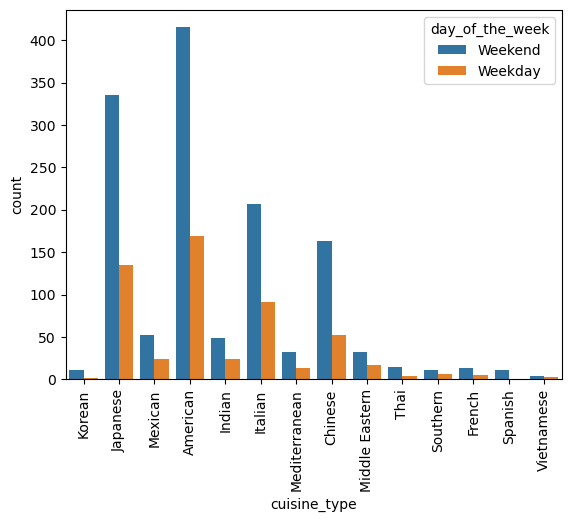

In [88]:
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation='vertical');

In [100]:
df_weekend=df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

In [103]:
df['restaurant_name'].nunique()

178

**Observations**
* American cuisine is most popular on the weekends, followed by Japanese, Italian and Chinese

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [126]:
df_orders_over_20 = df[df['cost_of_the_order']>20]

print('The number of orders that cost over $20 is', df_orders_over_20.shape[0])

The number of orders that cost over $20 is 555


In [127]:
df_orders_under_20 = df[df['cost_of_the_order']<20]

print('The number of orders that cost less than $20 is', df_orders_under_20.shape[0])

The number of orders that cost less than $20 is 1343


In [132]:
percentage = (df_orders_over_20.shape[0]/df.shape[0])*100
print('The percentage of orders over $20 is:', round(percentage,2),'%')

The percentage of orders over $20 is: 29.24 %


**Observations**
* 41% of orders cost more than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [36]:
df['delivery_time'].mean()

24.161749209694417

In [18]:
mean_time_sec = int(.16*60)
print('The average order delivery time is 24 and', mean_time_sec,'seconds.')

The average order delivery time is 24 and 9 seconds.


**Observations**
* The average delivery time per order is just over 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [13]:
df['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

**Observations**
* Customer_ids 52832 (13), 47440 (10), and 83287 (9) are the most frequent customers

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


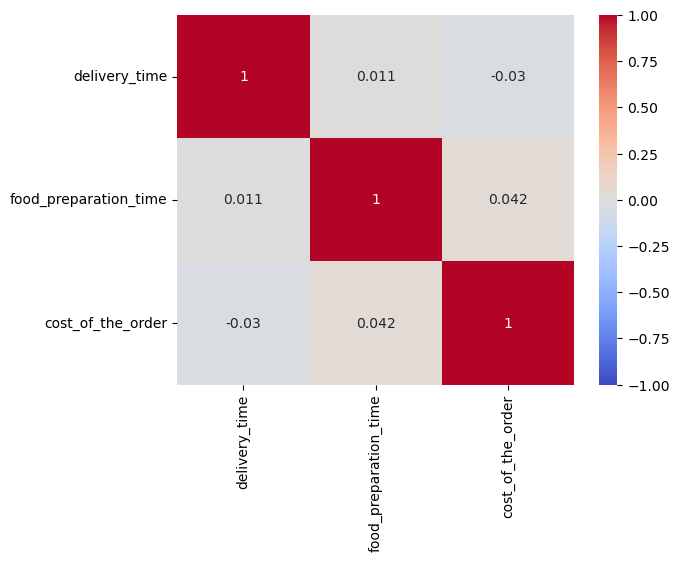

In [20]:
col_list = ['delivery_time', 'food_preparation_time', 'cost_of_the_order']
sns.heatmap(data=df[col_list].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

**Observations**
* There is a moderate positive correlation between food prep time and cost of order. This is understandable given that higher priced orders would entail more time, ingredients, and/or labor to prepare.

<Figure size 1000x500 with 0 Axes>

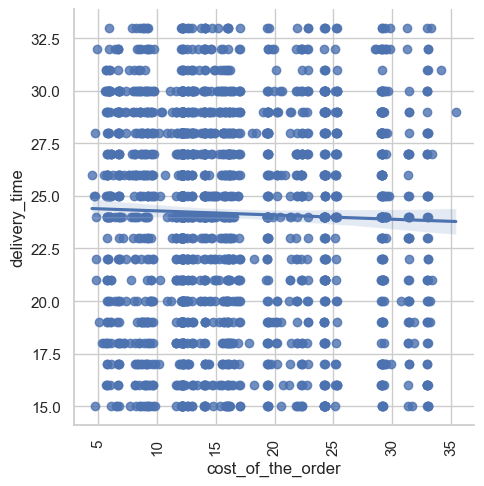

In [62]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.lmplot(data=df, x='cost_of_the_order', y='delivery_time')
plt.xticks(rotation='vertical')
plt.show();

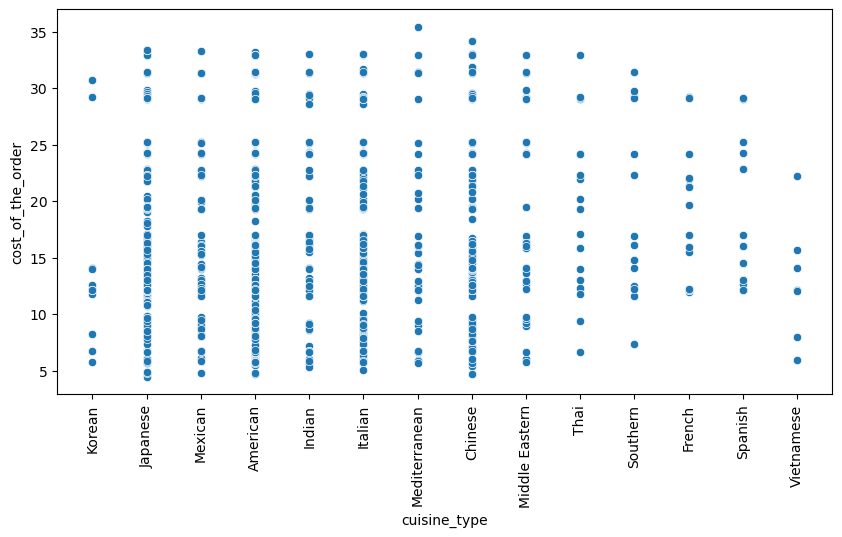

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation='vertical')
plt.show();

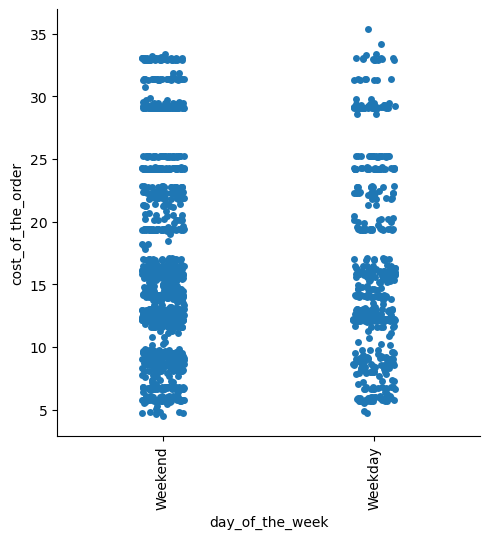

In [57]:
sns.catplot(data=df,x='day_of_the_week',y='cost_of_the_order',)
plt.xticks(rotation='vertical')
plt.show();

**Observations**
* Over 2/3's of orders occur on the weekends, so there is a greater concentration of orders across price points on Saturday/Sunday. There is a curious gap between about $25.50-28 where there are no orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [15]:
df_with_ratings= df.drop(df[df['rating']=='Not given'].index)
df_with_ratings['rating'] = df_with_ratings['rating'].astype('int')
df_rating_counts=df_with_ratings.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False)
df_rating_counts.head()

restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
Name: rating, dtype: int64

In [161]:
shake_shack_mean_rating = df_with_ratings[df_with_ratings['restaurant_name'] == 'Shake Shack']['rating'].mean()
print(shake_shack_mean_rating)

4.2781954887218046


In [165]:
meatball_shop_mean_rating = df_with_ratings[df_with_ratings['restaurant_name'] == 'The Meatball Shop']['rating'].mean()
print(meatball_shop_mean_rating)

4.511904761904762


In [168]:
blue_sushi_mean_rating = df_with_ratings[df_with_ratings['restaurant_name'] == 'Blue Ribbon Sushi']['rating'].mean()
print(blue_sushi_mean_rating)

4.219178082191781


In [170]:
blue_fried_mean_rating = df_with_ratings[df_with_ratings['restaurant_name'] == 'Blue Ribbon Fried Chicken']['rating'].mean()
print(blue_fried_mean_rating)

4.328125


**Observations**
* Four restaurants--Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken--have more than 50 ratings with a mean above 4. They are eligible to receive the promotional offer.

In [16]:
mean_rating = df_with_ratings['rating'].mean()
print(mean_rating)

4.344234079173838


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [175]:
def net_revenue(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return x * 0
    
df['net_revenue'] = df['cost_of_the_order'].apply(net_revenue)

In [240]:
total_revenue = df['net_revenue'].sum()
print(round(total_revenue, 2))

6166.3


**Observations**
The net revenue across all orders is $6,166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [18]:
total_delivery_time = df['food_preparation_time'] + df['delivery_time']
over_60_min = total_delivery_time[total_delivery_time > 60].count()
print('There were',over_60_min,'orders that took more than 60 minutes to be delivered.')

There were 200 orders that took more than 60 minutes to be delivered.


In [232]:
percent_over_60 = (over_60_min / df['order_id'].nunique()) * 100
print(round(percent_over_60,2))

10.54


**Observations**
* 10.5% of orders took more than 60 minutes to be delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [220]:
print(round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean(),2))

22.47


In [221]:
print(round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean(),2))

28.34


**Observations**
* The average delivery time is about 6 minutes longer on weekdays than on weekends.
* This is likely due to increased traffic during the week.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Weekends are a more popular time to order delivery than weekdays by a ratio of nearly 2.5:1
* The top five restaurants accounted for 1 out of every 3 orders, while the bottom 50 had only 1 each.
* There are 178 participating restaurants in total.
* The average order rating is 4.3 with 61% of orders rated (1162 of 1898).
* Average revenue/order is $3.25

### Recommendations:

* Market delivery service to more American, Italian, Japanese, and Chinese restaurants, as these are the most popular cuisine types.
* Consider a survey of restaurants to drive development of app enhancements (or other services) to increase utilization.
* Offer a promotion end-user customers for free delivery for first order to drive demand for restaurants.
* With average revenue of just $3.25/order, consider promoting delivery service to businesses as a value-add for employees and other larger groups (e.g., Free Lunch Fridays).

---